<h1>Tensor Network Space-Time Spectral Collocation Method for Solving the Nonlinear Convection Diffusion Equation</h1>

Dibyendu Adak, M. Engin Danis, Duc P. Truong, Kim Ø. Rasmussen & Boian S. Alexandrov 

http://link.springer.com/article/10.1007/s10915-025-02860-x

This notebook corresponds to the Tensor-Train implementation of example 1 in the above paper:  Step Truncation TT-Newton Method

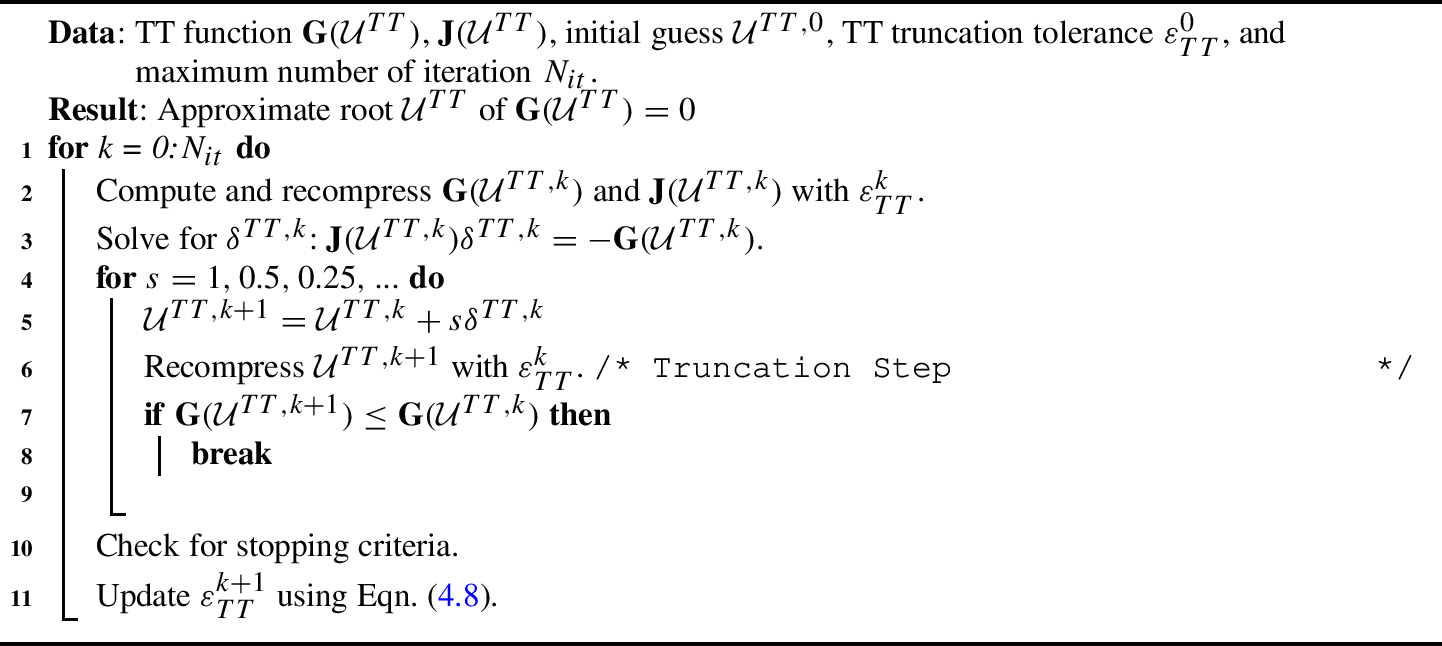

In [1]:
addpath(genpath('../../../matlab/Linear-STSC/src/'))
addpath(genpath('../../../matlab/Non-linear-STSC/src/'))
addpath(genpath('../../../matlab/utils/chebfun/'))
addpath(genpath('../../../matlab/utils/tt-toolbox/'))
addpath(genpath('../../../matlab/utils/ttfunc/'))

close all; clear; clc;

In [2]:
%% create test case
n = 12;
d = 4;
r = 2;
epstt = 2e-8;
utrue = tt_rand(n,d,2);
ftemp = @(u,eps) round(amen_cross({u}, @(x) exp(-x),eps,'verb',0) - ...
  amen_cross({u}, @(x) x.^2,eps,'verb',0), eps);
ftemptrue = ftemp(utrue,eps);
F = @(u,eps) round(ftemp(u,eps) - ftemptrue,eps);
Jfun = @(u,eps) round(...
  -make_tt_to_operator(amen_cross({u}, @(x) exp(-x),eps,'verb',0)) ...
  - 2*make_tt_to_operator(u)...
  ,eps);

%%
Itertime = [];
R = [];
ResNorm = [];
LocErr = [];
%%
U0 = 15*tt_rand(n,d,1);
epsk = 1e-1;
eps = 1e-6;
nrmFU0 = norm(F(U0,epsk));
maxiter = 1000;

for k = 1:maxiter
  tsiter = datetime;
  % epsk = epsk*epsfactor;
  fprintf('\n******** Newton iter = %d ************\n\n', k);
  fprintf('epsk = %.5e \n', epsk);

  % compute Jacobian with JFbc
  Jmatk = Jfun(U0,epstt);

  % Jmatk = Jfuntt(Btt,Laptt,Ku,dKudu,dFudu,U0,tol);

  % use GMRES to solve for du
  b = -F(U0,epstt);

  du = amen_solve2(Jmatk,b,epsk,'nswp',30,'verb',1);

  tegmres = datetime;
  fprintf('Linear Solve Time = %.2f\n', seconds(tegmres-tsiter));

  %update U1
  for alpha = [1,1/2,1/4,1/8,1/16]
    fprintf('testing alpha = %.5f \n',alpha);
    U1 = round(U0 + alpha*du, max(epsk,epstt));
    if norm(F(U1,epstt))<norm(F(U0,epstt))
      break;
    end
  end
  
  % save the rank
  R = [R, U1.r];

  %compute local error
  local_err=norm(U1-U0)/norm(U0);
  res_norm = norm(F(U1,epstt))/nrmFU0;
  ResNorm = [ResNorm, res_norm];
  LocErr = [LocErr, local_err];
  % #* set epsk
  epsk = min(min([local_err,res_norm]),epsk);
  % epsk = 0.5*min([local_err,res_norm]);

  fprintf('apha = %.2e \n', alpha);
  fprintf('u_err = %.5e,  Fu_ratio = %.5e \n', local_err, res_norm)
  Itertime = [Itertime, seconds(datetime-tsiter)];
  fprintf('iter time = %.2f \n', seconds(datetime-tsiter));
  if (local_err<eps) && (res_norm<eps)
    break;
  end
  U0 = U1;
end


%%
uest = U0;
error = norm(utrue - uest)/norm(utrue);
fprintf('Err = %.2e \n', error)

save('../plot_data/tt_newton_example.mat','Itertime','R','error','ResNorm','LocErr');





=amen_cross= Will exit since the error stopped decreasing
=amen_cross= Will exit since the error stopped decreasing

******** Newton iter = 1 ************

epsk = 1.00000e-01 


=amen_solve= sweep 1, max_dx: 6.329e+00, max_res: 6.287e+00, max_rank: 6
=amen_solve= sweep 2, max_dx: 3.576e-02, max_res: 3.674e-02, max_rank: 7
=amen_solve= sweep 3, max_dx: 1.801e-03, max_res: 4.242e-03, max_rank: 3
Linear Solve Time = 0.18
testing alpha = 1.00000 
=amen_cross= Will exit since the error stopped decreasing
=amen_cross= Will exit since the error stopped decreasing
=amen_cross= Will exit since the error stopped decreasing
=amen_cross= Will exit since the error stopped decreasing
apha = 1.00e+00 
u_err = 1.01266e+00,  Fu_ratio = 1.68223e-01 
iter time = 0.70 

******** Newton iter = 2 ************

epsk = 1.00000e-01 
=amen_cross= Will exit since the error stopped decreasing
=amen_cross= Will exit since the error stopped decreasing
=amen_cross= Will exit since the error stopped decreasing
=amen_cross= Will exit since the error stopped decreasing


=amen_solve= sweep 1, max_dx: 5.037e+01, max_res: 4.982e+01, max_rank: 6
=amen_solve= sweep 2, max_dx: 3.627e-02, max_res: 3.509e-02, max_rank: 8
=amen_solve= sweep 3, max_dx: 7.266e-04, max_res: 8.200e-03, max_rank: 4
Linear Solve Time = 0.29
testing alpha = 1.00000 
=amen_cross= Will exit since the error stopped decreasing
=amen_cross= Will exit since the error stopped decreasing
apha = 1.00e+00 
u_err = 1.04718e+00,  Fu_ratio = 1.20319e-02 
iter time = 0.83 

******** Newton iter = 3 ************

epsk = 1.20319e-02 
=amen_cross= Will exit since the error stopped decreasing


=amen_solve= sweep 1, max_dx: 7.425e+01, max_res: 7.422e+01, max_rank: 6
=amen_solve= sweep 2, max_dx: 4.872e-02, max_res: 4.858e-02, max_rank: 10
=amen_solve= sweep 3, max_dx: 5.284e-03, max_res: 5.265e-03, max_rank: 11
=amen_solve= sweep 4, max_dx: 0.000e+00, max_res: 3.855e-04, max_rank: 7
Linear Solve Time = 0.47
testing alpha = 1.00000 
=amen_cross= Will exit since the error stopped decreasing
=amen_cross= Will exit since the error stopped decreasing
apha = 1.00e+00 
u_err = 1.75959e-01,  Fu_ratio = 6.20816e-05 
iter time = 0.69 

******** Newton iter = 4 ************

epsk = 6.20816e-05 


=amen_solve= sweep 1, max_dx: 9.245e+04, max_res: 9.245e+04, max_rank: 6
=amen_solve= sweep 2, max_dx: 7.129e-03, max_res: 7.133e-03, max_rank: 10
=amen_solve= sweep 3, max_dx: 3.371e-04, max_res: 3.372e-04, max_rank: 14
=amen_solve= sweep 4, max_dx: 1.364e-04, max_res: 1.364e-04, max_rank: 18
=amen_solve= sweep 5, max_dx: 4.265e-05, max_res: 4.266e-05, max_rank: 22
=amen_solve= sweep 6, max_dx: 0.000e+00, max_res: 8.362e-06, max_rank: 20
Linear Solve Time = 0.15
testing alpha = 1.00000 
apha = 1.00e+00 
u_err = 9.20431e-04,  Fu_ratio = 1.29856e-07 
iter time = 0.40 

******** Newton iter = 5 ************

epsk = 1.29856e-07 


=amen_solve= sweep 1, max_dx: 4.117e+07, max_res: 4.117e+07, max_rank: 6
=amen_solve= sweep 2, max_dx: 3.295e-01, max_res: 3.296e-01, max_rank: 10
=amen_solve= sweep 3, max_dx: 1.340e-01, max_res: 1.339e-01, max_rank: 14
=amen_solve= sweep 4, max_dx: 4.885e-02, max_res: 4.887e-02, max_rank: 18
=amen_solve= sweep 5, max_dx: 1.994e-02, max_res: 1.996e-02, max_rank: 22
=amen_solve= sweep 6, max_dx: 7.595e-03, max_res: 7.600e-03, max_rank: 26
=amen_solve= sweep 7, max_dx: 4.714e-04, max_res: 4.711e-04, max_rank: 30
=amen_solve= sweep 8, max_dx: 9.157e-05, max_res: 9.163e-05, max_rank: 34
=amen_solve= sweep 9, max_dx: 1.791e-05, max_res: 1.792e-05, max_rank: 38
=amen_solve= sweep 10, max_dx: 1.922e-06, max_res: 1.923e-06, max_rank: 42
=amen_solve= sweep 11, max_dx: 5.658e-07, max_res: 5.666e-07, max_rank: 46
=amen_solve= sweep 12, max_dx: 7.324e-08, max_res: 7.334e-08, max_rank: 49
=amen_solve= sweep 13, max_dx: 0.000e+00, max_res: 1.402e-08, max_rank: 46
Linear Solve Time = 0.25
testing al